In [2]:
#Import packages and read the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path =r'C:\Users\REDDY\DATA SCIENCE\python datafiles\Visadataset - Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [3]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

$ prevailingwage $

- in the numerical analysis
- mean median std count 25p 50p

In [5]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [6]:
len(visa_df['prevailing_wage'])

25480

In [7]:
visa_df['prevailing_wage'].count()

25480

$ mean $

In [8]:
visa_df['prevailing_wage'].mean()

74455.81459209221

In [9]:
np.mean(visa_df['prevailing_wage'])

74455.81459209221

$ medain $

In [10]:
visa_df['prevailing_wage'].medianan()

70308.20999999999

In [11]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

$ max $

In [12]:
visa_df['prevailing_wage'].max()

319210.27

In [13]:
np.max(visa_df['prevailing_wage'])

319210.27

$ min $

In [14]:
visa_df['prevailing_wage'].min()

2.1367

In [15]:
np.min(visa_df['prevailing_wage'])

2.1367

$ std $

In [16]:
visa_df['prevailing_wage'].std()

52815.94232687357

In [19]:
## all together
wage_count=round(visa_df['prevailing_wage'].count(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)

l=[wage_count,wage_max,wage_min,wage_mean,wage_median,wage_std]
cols=['prevailing_wage']
index=['count','max','min','mean','median','std']
pd.DataFrame(l,columns=cols,index=index)

,prevailing_wage
count,25480.00
max,319210.27
min,2.14
mean,74455.81
median,70308.21
std,52815.94


$ percentile-quantile $
- perecntile and quantile available in numpy
- np.percentile()
   - column name
   - percentile value between 0 to 100
- np.quantile()
     - column name
     - 0 to 1
- In quantile 0.25 means 25 in percentile

In [20]:
np.percentile(visa_df['prevailing_wage'],25)

34015.479999999996

In [21]:
np.quantile(visa_df['prevailing_wage'],0.25)

34015.479999999996

$ what is the mean of 25percentile=34015.47 $
- 25percentage of total data has wage less than 34014.47
- Find 25percentage of total data =25*25480/100= 6370
- 6370 person wages has less than 34014

In [23]:
con=visa_df['prevailing_wage']<34014
len(visa_df[con])

6370

In [24]:
# Can you valid quickly for 50p data
wage_50=np.percentile(visa_df['prevailing_wage'],50)
con=visa_df['prevailing_wage']<wage_50
len(visa_df[con])

12740

In [25]:
## all together
wage_count=round(visa_df['prevailing_wage'].count(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
wage_25=np.percentile(visa_df['prevailing_wage'],25)
wage_50=np.percentile(visa_df['prevailing_wage'],50)
wage_75=np.percentile(visa_df['prevailing_wage'],75)
l=[wage_count,wage_max,wage_min,
wage_mean,wage_median,wage_std,
wage_25,wage_50,wage_75]
cols=['prevailing_wage']
index=['count','max','min',
'mean','median','std',
'25%','50%','75%']
pd.DataFrame(l,columns=cols,index=index)

,prevailing_wage
count,25480.0000
max,319210.2700
min,2.1400
mean,74455.8100
median,70308.2100
std,52815.9400
25%,34015.4800
50%,70308.2100
75%,107735.5125


In [26]:
visa_df.describe()
# 3 numerical columns

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [30]:
## all together
cols=visa_df.select_dtypes(exclude='object').columns
l=[]
for i in cols:
    count=round(visa_df[i].count(),2)
    maxx=round(visa_df[i].max(),2)
    minn=round(visa_df[i].min(),2)
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    std=round(visa_df[i].std(),2)
    p_25=np.percentile(visa_df[i],25)
    p_50=np.percentile(visa_df[i],50)
    p_75=np.percentile(visa_df[i],75)
    l.append([count,maxx,minn,mean,median,std,
              p_25,p_50,p_75])
print(l)
index=['count','max','min',
       'mean','median','std',
       '25%','50%','75%']
pd.DataFrame(zip(l[0],l[1],l[2]),columns=cols,index=index)

[[25480, 602069, -26, 5667.04, 2109.0, 22877.93, 1022.0, 2109.0, 3504.0], [25480, 2016, 1800, 1979.41, 1997.0, 42.37, 1976.0, 1997.0, 2005.0], [25480, 319210.27, 2.14, 74455.81, 70308.21, 52815.94, 34015.479999999996, 70308.20999999999, 107735.51250000001]]


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.0000
max,602069.00,2016.00,319210.2700
min,-26.00,1800.00,2.1400
mean,5667.04,1979.41,74455.8100
median,2109.00,1997.00,70308.2100
std,22877.93,42.37,52815.9400
25%,1022.00,1976.00,34015.4800
50%,2109.00,1997.00,70308.2100
75%,3504.00,2005.00,107735.5125


In [31]:
## all together
cols=visa_df.select_dtypes(exclude='object').columns
d={}
for i in cols:
    count=round(visa_df[i].count(),2)
    maxx=round(visa_df[i].max(),2)
    minn=round(visa_df[i].min(),2)
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    std=round(visa_df[i].std(),2)
    p_25=np.percentile(visa_df[i],25)
    p_50=np.percentile(visa_df[i],50)
    p_75=np.percentile(visa_df[i],75)
    d[i]=[count,maxx,minn,mean,median,std,p_25,p_50,p_75]

index=['count','max','min',
       'mean','median','std',
       '25%','50%','75%']
pd.DataFrame(d,index=index)

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.0000
max,602069.00,2016.00,319210.2700
min,-26.00,1800.00,2.1400
mean,5667.04,1979.41,74455.8100
median,2109.00,1997.00,70308.2100
std,22877.93,42.37,52815.9400
25%,1022.00,1976.00,34015.4800
50%,2109.00,1997.00,70308.2100
75%,3504.00,2005.00,107735.5125


In [40]:
#Import packages and read the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path =r'C:\Users\REDDY\DATA SCIENCE\python datafiles\Visadataset - Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


$ histogram $

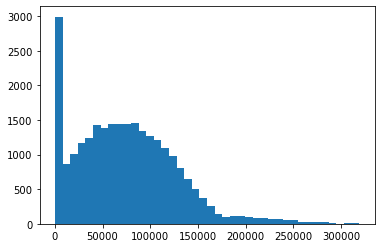

In [41]:
f,i,n=plt.hist(visa_df['prevailing_wage'],
               bins=40)

In [42]:
len(f),len(i),len(n)

(40, 41, 40)

In [43]:
f

array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
       1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
        509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
         79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
          7.,    3.,    6.,    5.])

In [44]:
i

array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
       3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
       6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
       9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
       1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
       1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
       1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
       2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
       2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
       2.87289457e+05, 2.95269660e+05, 3.03249863e+05, 3.11230067e+05,
       3.19210270e+05])

In [46]:
between 2.13670000e+00 to 7.98234003e+03
we have 2992 observations


between 7.98234003e+03 to 1.59625434e+04
we have 871 observations


SyntaxError: invalid syntax (3404405011.py, line 1)

In [47]:
l=2.13670000e+00
u=7.98234003e+03
c1=visa_df['prevailing_wage']>=l
c2=visa_df['prevailing_wage']<u
c=c1&c2
len(visa_df[c])

2992

In [49]:
def frquency(l,u):
    c1=visa_df['prevailing_wage']>=l
    c2=visa_df['prevailing_wage']<u
    c=c1&c2
    print(len(visa_df[c]))
frquency(7.98234003e+03,1.59625434e+04)

871


In [52]:
# Task-1
Craeate  a  dataframe
lower  upper  frquency
2.136  7.98   2992

SyntaxError: invalid syntax (1588623049.py, line 2)

In [53]:
# task-2:
# In seaborn how to plot histogram

$ Boxplot $
- Boxplot is used to identify outliers
- In box plot we have
    -Q1: 25p value
    - Q2: 50p value
    - Q3: 75p value
    - IQR: Q3-Q1
    - Mild outliers Q1-1.5IQR and Q3+1.5IQR
    - huge outliers Q1-3IQR and Q3+3IQR

      Q1-1.5IQR Q1 median Q3 Q3+1.5IQR
      
      
                   |-----:-----|          
      o     |------|     :     |--------|     o o
                   |-----:-----|
      flier        <----------->            fliers
                        IQR

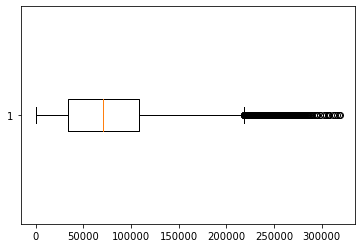

In [54]:
plt.boxplot(visa_df['prevailing_wage'],
            vert=False)
plt.show()
# black dots are outliers
# orange line is median